In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from IPython.display import IFrame
from IPython.core.display import display
import os
import time
import seaborn as sns

In [25]:
### Load the data that is time ready for machine learning code.
def read_crime_data():
    
    file = os.path.join('../Resources','prepared_data_MLXY_500.csv')
    crime_df = pd.read_csv(file)
    return crime_df

In [26]:
df_cleaned=read_crime_data()

In [4]:
### Splitting data for training and testing

#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
feature_col_names = ['IUCR','sin_time' ,'cos_time', 'XAxis', 'YAxis']
predicted_class_names = ['Arrest']

X = df_cleaned[feature_col_names].values     # predictor feature columns (8 X m)
y = df_cleaned[predicted_class_names].values # predicted class (1=true, 0=false) column (1 X m)
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42) 
                            # test_size = 0.3 is 30%, 42 is the answer to everything

In [5]:
##We check to ensure we have the the desired 70% train, 30% test split of the data
print("{0:0.2f}% in training set".format((len(X_train)/len(df_cleaned.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(df_cleaned.index)) * 100))

70.00% in training set
30.00% in test set


In [7]:
from sklearn import metrics

In [8]:
print("Original True  : {0} ({1:0.2f}%)".format(len(df_cleaned.loc[df_cleaned['Arrest'] == 1]), (len(df_cleaned.loc[df_cleaned['Arrest'] == 1])/len(df_cleaned.index)) * 100.0))
print("Original False : {0} ({1:0.2f}%)".format(len(df_cleaned.loc[df_cleaned['Arrest'] == 0]), (len(df_cleaned.loc[df_cleaned['Arrest'] == 0])/len(df_cleaned.index)) * 100.0))
print("")
print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("")
print("Test True      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))

Original True  : 1718992 (27.35%)
Original False : 4566975 (72.65%)

Training True  : 1202747 (27.33%)
Training False : 3197429 (72.67%)

Test True      : 516245 (27.38%)
Test False     : 1369546 (72.62%)


In [9]:
from sklearn.linear_model import LogisticRegression

lr_model =LogisticRegression(C=0.7, random_state=42, solver='liblinear', max_iter=10000)
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print(metrics.confusion_matrix(y_test, lr_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test))

Accuracy: 0.7188
[[1334999   34547]
 [ 495703   20542]]

Classification Report
              precision    recall  f1-score   support

           0       0.73      0.97      0.83   1369546
           1       0.37      0.04      0.07    516245

   micro avg       0.72      0.72      0.72   1885791
   macro avg       0.55      0.51      0.45   1885791
weighted avg       0.63      0.72      0.63   1885791



1st max value of 0.040 occured at C=0.100


Text(0, 0.5, 'recall score')

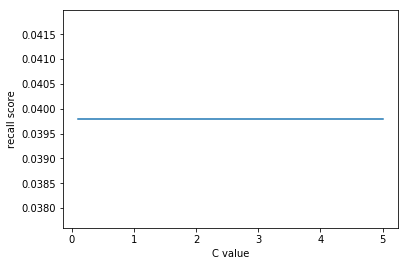

In [10]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, random_state=42, solver='liblinear')
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline 
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

Logistic regression with class weight= balanced

1st max value of 0.599 occured at C=0.100


Text(0, 0.5, 'recall score')

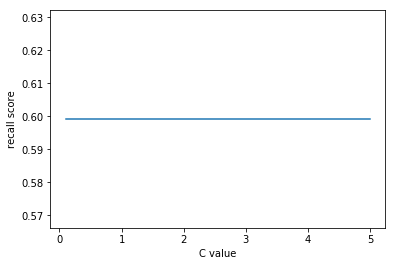

In [11]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, class_weight="balanced", random_state=42, solver='liblinear', max_iter=10000)
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline 
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

In [11]:
from sklearn.linear_model import LogisticRegression
lr_model =LogisticRegression( class_weight="balanced", C=best_score_C_val, random_state=42, solver='liblinear')
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print(metrics.confusion_matrix(y_test, lr_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test))
print(metrics.recall_score(y_test, lr_predict_test))

Accuracy: 0.6976
[[1006257  363289]
 [ 206925  309320]]

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.73      0.78   1369546
           1       0.46      0.60      0.52    516245

   micro avg       0.70      0.70      0.70   1885791
   macro avg       0.64      0.67      0.65   1885791
weighted avg       0.73      0.70      0.71   1885791

0.5991728733450203


## Logistic regression + Cross Validation

In [12]:
from sklearn.linear_model import LogisticRegressionCV
lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=10, refit=False, class_weight="balanced", max_iter=500)  # set number of jobs to -1 which uses all cores to parallelize
lr_cv_model.fit(X_train, y_train.ravel())

LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=500,
           multi_class='warn', n_jobs=-1, penalty='l2', random_state=42,
           refit=False, scoring=None, solver='lbfgs', tol=0.0001,
           verbose=0)

In [14]:
lr_cv_predict_test = lr_cv_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_cv_predict_test)))
print(metrics.confusion_matrix(y_test, lr_cv_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_cv_predict_test))

Accuracy: 0.6976
[[1006258  363288]
 [ 206925  309320]]

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.73      0.78   1369546
           1       0.46      0.60      0.52    516245

   micro avg       0.70      0.70      0.70   1885791
   macro avg       0.64      0.67      0.65   1885791
weighted avg       0.73      0.70      0.71   1885791



## Save the trained and tested model into a file

In [15]:
from sklearn.externals import joblib  
joblib.dump(lr_cv_model, "./chicago-crime-trained-LR500model.pkl")

['./chicago-crime-trained-LR500model.pkl']

In [27]:
df_cleaned.head(2)

,ID,Date,IUCR,CrimeType,Location Description,Arrest,Domestic,Ward,Community Area,FBI Code,...,Police Districts,Police Beats,OnlyDate,Time,time_hour,hourofday,sin_time,cos_time,XAxis,YAxis
0,11858344,10/12/2019 08:00:00 AM,820,THEFT,STREET,0,0,35.0,16.0,06,...,1.0,20.0,2019-10-12,08:00:00 AM,08:00:00,8,0.81697,-0.57668,1152059.0,1924617.0
1,11859895,10/12/2019 08:00:00 AM,1310,CRIMINAL DAMAGE,RESIDENCE,0,0,6.0,68.0,14,...,17.0,214.0,2019-10-12,08:00:00 AM,08:00:00,8,0.81697,-0.57668,1174167.0,1858167.0


In [28]:
for col in df_cleaned.columns: 
    print(col) 

ID
Date
IUCR
CrimeType
Location Description
Arrest
Domestic
Ward
Community Area
FBI Code
Year
Updated On
Latitude
Longitude
Zip Codes
Community Areas
Census Tracts
Wards
Boundaries - ZIP Codes
Police Districts
Police Beats
OnlyDate
Time
time_hour
hourofday
sin_time
cos_time
XAxis
YAxis


In [45]:
##Dropped all the columns that are not used.
#df_cleaned = df_cleaned.drop(["time_hour"], axis=1)

In [46]:
df_cleaned.head(2)

,Arrest,IUCR,sin_time,cos_time,XAxis,YAxis
0,0,820,0.81697,-0.57668,1152059.0,1924617.0
1,0,1310,0.81697,-0.57668,1174167.0,1858167.0


In [40]:
df_cleaned = df_cleaned[['Arrest', 'IUCR', 'sin_time', 'cos_time', 'XAxis', 'YAxis']]

In [47]:
from sklearn.decomposition import PCA
X = df_cleaned.iloc[:,1:]
y = df_cleaned.iloc[:,0]

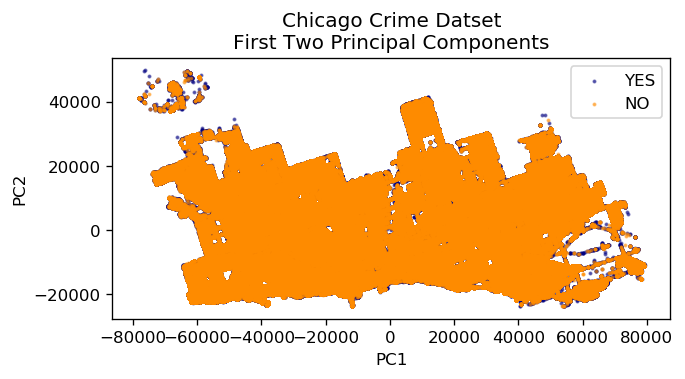

In [48]:

pca = PCA(n_components=2).fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(pca, y, random_state=0)

plt.figure(dpi=120)
plt.scatter(pca[y.values==0,0], pca[y.values==0,1], alpha=0.5, label='YES', s=2, color='navy')
plt.scatter(pca[y.values==1,0], pca[y.values==1,1], alpha=0.5, label='NO', s=2, color='darkorange')
plt.legend()
plt.title('Chicago Crime Datset\nFirst Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.gca().set_aspect('equal')
plt.show()